In [1]:
%matplotlib inline
import os
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import palettable
import seaborn as sns
from matplotlib import gridspec

import sys
sys.path.append('../../Code')
from utils import save_adata, read_adata

from harmony import harmonize


sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.set_figure_params(scanpy=True, dpi=80, vector_friendly=False, ipython_format='png')

results_dir = '../../../results'


/opt/miniconda3/envs/seqwell/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


scanpy==1.4.4.post1 anndata==0.7.1 umap==0.3.10 numpy==1.18.1 scipy==1.4.1 pandas==1.0.3 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


In [2]:
pbmcdir = '../../../data/HCA_BoneMarrow/PBMC'
if not os.path.exists(pbmcdir):
    os.mkdir(pbmcdir)
    
pbmcdir = '../../../data/HCA_BoneMarrow/PBMC/Merge'
if not os.path.exists(pbmcdir):
    os.mkdir(pbmcdir)

In [54]:
urls = ['http://cf.10xgenomics.com/samples/cell-exp/3.1.0/5k_pbmc_NGSC3_aggr/5k_pbmc_NGSC3_aggr_filtered_feature_bc_matrix.h5',
        'http://cf.10xgenomics.com/samples/cell-exp/3.0.2/5k_pbmc_v3/5k_pbmc_v3_filtered_feature_bc_matrix.h5',
        'http://cf.10xgenomics.com/samples/cell-exp/3.0.2/5k_pbmc_v3_nextgem/5k_pbmc_v3_nextgem_filtered_feature_bc_matrix.h5',
        'http://cf.10xgenomics.com/samples/cell-exp/3.0.2/5k_pbmc_protein_v3/5k_pbmc_protein_v3_filtered_feature_bc_matrix.h5',
        'http://cf.10xgenomics.com/samples/cell-exp/3.0.2/5k_pbmc_protein_v3_nextgem/5k_pbmc_protein_v3_nextgem_filtered_feature_bc_matrix.h5',
        'http://cf.10xgenomics.com/samples/cell-exp/3.0.0/pbmc_10k_protein_v3/pbmc_10k_protein_v3_filtered_feature_bc_matrix.h5',
        'http://cf.10xgenomics.com/samples/cell-exp/3.0.0/pbmc_10k_v3/pbmc_10k_v3_filtered_feature_bc_matrix.h5'
       ]

adatas = []
for url in urls:
    cmd = 'wget %s' % url
    print(cmd)
    !{cmd}
    fn = url.split('/')[-1]
    cmd = 'mv %s %s' % (fn, pbmcdir)
    print(cmd)
    !{cmd}
    fullfn = os.path.join(pbmcdir, fn)
    adata = sc.read_10x_h5(fullfn)
    adata.obs['file'] = fn
    adata.obs['barcode'] = adata.obs.index
    adata.obs.index = adata.obs['file'] + '_' + adata.obs['barcode']
    adatas.append(adata)

wget http://cf.10xgenomics.com/samples/cell-exp/3.1.0/5k_pbmc_NGSC3_aggr/5k_pbmc_NGSC3_aggr_filtered_feature_bc_matrix.h5
--2020-05-20 16:22:33--  http://cf.10xgenomics.com/samples/cell-exp/3.1.0/5k_pbmc_NGSC3_aggr/5k_pbmc_NGSC3_aggr_filtered_feature_bc_matrix.h5
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 13.249.87.59, 13.249.87.106, 13.249.87.92, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|13.249.87.59|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 171010628 (163M) [binary/octet-stream]
Saving to: ‘5k_pbmc_NGSC3_aggr_filtered_feature_bc_matrix.h5’

5k_pbmc_NGSC3_aggr_ 100%[===================>] 163.09M   247MB/s    in 0.7s    

2020-05-20 16:22:34 (247 MB/s) - ‘5k_pbmc_NGSC3_aggr_filtered_feature_bc_matrix.h5’ saved [171010628/171010628]

mv 5k_pbmc_NGSC3_aggr_filtered_feature_bc_matrix.h5 ../../../data/HCA_BoneMarrow/PBMC/Merge
reading ../../../data/HCA_BoneMarrow/PBMC/Merge/5k_pbmc_NGSC3_aggr_filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:05)


Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


wget http://cf.10xgenomics.com/samples/cell-exp/3.0.2/5k_pbmc_v3/5k_pbmc_v3_filtered_feature_bc_matrix.h5
--2020-05-20 16:22:42--  http://cf.10xgenomics.com/samples/cell-exp/3.0.2/5k_pbmc_v3/5k_pbmc_v3_filtered_feature_bc_matrix.h5
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 13.249.87.59, 13.249.87.106, 13.249.87.92, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|13.249.87.59|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18098007 (17M) [binary/octet-stream]
Saving to: ‘5k_pbmc_v3_filtered_feature_bc_matrix.h5’

5k_pbmc_v3_filtered 100%[===================>]  17.26M  41.1MB/s    in 0.4s    

2020-05-20 16:22:42 (41.1 MB/s) - ‘5k_pbmc_v3_filtered_feature_bc_matrix.h5’ saved [18098007/18098007]

mv 5k_pbmc_v3_filtered_feature_bc_matrix.h5 ../../../data/HCA_BoneMarrow/PBMC/Merge
reading ../../../data/HCA_BoneMarrow/PBMC/Merge/5k_pbmc_v3_filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


wget http://cf.10xgenomics.com/samples/cell-exp/3.0.2/5k_pbmc_v3_nextgem/5k_pbmc_v3_nextgem_filtered_feature_bc_matrix.h5
--2020-05-20 16:22:43--  http://cf.10xgenomics.com/samples/cell-exp/3.0.2/5k_pbmc_v3_nextgem/5k_pbmc_v3_nextgem_filtered_feature_bc_matrix.h5
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 13.249.87.59, 13.249.87.106, 13.249.87.92, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|13.249.87.59|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18140271 (17M) [binary/octet-stream]
Saving to: ‘5k_pbmc_v3_nextgem_filtered_feature_bc_matrix.h5’

5k_pbmc_v3_nextgem_ 100%[===================>]  17.30M  53.2MB/s    in 0.3s    

2020-05-20 16:22:44 (53.2 MB/s) - ‘5k_pbmc_v3_nextgem_filtered_feature_bc_matrix.h5’ saved [18140271/18140271]

mv 5k_pbmc_v3_nextgem_filtered_feature_bc_matrix.h5 ../../../data/HCA_BoneMarrow/PBMC/Merge
reading ../../../data/HCA_BoneMarrow/PBMC/Merge/5k_pbmc_v3_nextgem_filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


wget http://cf.10xgenomics.com/samples/cell-exp/3.0.2/5k_pbmc_protein_v3/5k_pbmc_protein_v3_filtered_feature_bc_matrix.h5
--2020-05-20 16:22:45--  http://cf.10xgenomics.com/samples/cell-exp/3.0.2/5k_pbmc_protein_v3/5k_pbmc_protein_v3_filtered_feature_bc_matrix.h5
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 13.249.87.59, 13.249.87.106, 13.249.87.92, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|13.249.87.59|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17129253 (16M) [binary/octet-stream]
Saving to: ‘5k_pbmc_protein_v3_filtered_feature_bc_matrix.h5’

5k_pbmc_protein_v3_ 100%[===================>]  16.33M  50.7MB/s    in 0.3s    

2020-05-20 16:22:45 (50.7 MB/s) - ‘5k_pbmc_protein_v3_filtered_feature_bc_matrix.h5’ saved [17129253/17129253]

mv 5k_pbmc_protein_v3_filtered_feature_bc_matrix.h5 ../../../data/HCA_BoneMarrow/PBMC/Merge
reading ../../../data/HCA_BoneMarrow/PBMC/Merge/5k_pbmc_protein_v3_filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


wget http://cf.10xgenomics.com/samples/cell-exp/3.0.2/5k_pbmc_protein_v3_nextgem/5k_pbmc_protein_v3_nextgem_filtered_feature_bc_matrix.h5
--2020-05-20 16:22:46--  http://cf.10xgenomics.com/samples/cell-exp/3.0.2/5k_pbmc_protein_v3_nextgem/5k_pbmc_protein_v3_nextgem_filtered_feature_bc_matrix.h5
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 13.249.87.59, 13.249.87.106, 13.249.87.92, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|13.249.87.59|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18101695 (17M) [binary/octet-stream]
Saving to: ‘5k_pbmc_protein_v3_nextgem_filtered_feature_bc_matrix.h5’

5k_pbmc_protein_v3_ 100%[===================>]  17.26M  70.1MB/s    in 0.2s    

2020-05-20 16:22:46 (70.1 MB/s) - ‘5k_pbmc_protein_v3_nextgem_filtered_feature_bc_matrix.h5’ saved [18101695/18101695]

mv 5k_pbmc_protein_v3_nextgem_filtered_feature_bc_matrix.h5 ../../../data/HCA_BoneMarrow/PBMC/Merge
reading ../../../data/HCA_BoneMarrow/PBMC/Merge/5k_pbmc

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


wget http://cf.10xgenomics.com/samples/cell-exp/3.0.0/pbmc_10k_protein_v3/pbmc_10k_protein_v3_filtered_feature_bc_matrix.h5
--2020-05-20 16:22:47--  http://cf.10xgenomics.com/samples/cell-exp/3.0.0/pbmc_10k_protein_v3/pbmc_10k_protein_v3_filtered_feature_bc_matrix.h5
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 13.249.87.59, 13.249.87.106, 13.249.87.92, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|13.249.87.59|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21788278 (21M) [binary/octet-stream]
Saving to: ‘pbmc_10k_protein_v3_filtered_feature_bc_matrix.h5’

pbmc_10k_protein_v3 100%[===================>]  20.78M  76.9MB/s    in 0.3s    

2020-05-20 16:22:48 (76.9 MB/s) - ‘pbmc_10k_protein_v3_filtered_feature_bc_matrix.h5’ saved [21788278/21788278]

mv pbmc_10k_protein_v3_filtered_feature_bc_matrix.h5 ../../../data/HCA_BoneMarrow/PBMC/Merge
reading ../../../data/HCA_BoneMarrow/PBMC/Merge/pbmc_10k_protein_v3_filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


wget http://cf.10xgenomics.com/samples/cell-exp/3.0.0/pbmc_10k_v3/pbmc_10k_v3_filtered_feature_bc_matrix.h5
--2020-05-20 16:22:49--  http://cf.10xgenomics.com/samples/cell-exp/3.0.0/pbmc_10k_v3/pbmc_10k_v3_filtered_feature_bc_matrix.h5
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 13.249.87.59, 13.249.87.106, 13.249.87.92, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|13.249.87.59|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37491093 (36M) [binary/octet-stream]
Saving to: ‘pbmc_10k_v3_filtered_feature_bc_matrix.h5’

pbmc_10k_v3_filtere 100%[===================>]  35.75M  64.5MB/s    in 0.6s    

2020-05-20 16:22:49 (64.5 MB/s) - ‘pbmc_10k_v3_filtered_feature_bc_matrix.h5’ saved [37491093/37491093]

mv pbmc_10k_v3_filtered_feature_bc_matrix.h5 ../../../data/HCA_BoneMarrow/PBMC/Merge
reading ../../../data/HCA_BoneMarrow/PBMC/Merge/pbmc_10k_v3_filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:01)


Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [55]:
adata = adatas[0].concatenate(adatas[1:])

Making variable names unique for controlled concatenation.


In [60]:
save_adata(adata, '../../../data/HCA_BoneMarrow/PBMC/Merge/Merged.10X.V3.PBMC.raw.h5ad')

Only considering the two last: ['.raw', '.h5ad'].
Only considering the two last: ['.raw', '.h5ad'].


... storing 'barcode' as categorical
... storing 'file' as categorical
... storing 'feature_types' as categorical
... storing 'genome' as categorical


In [3]:
adata = read_adata('../../../data/HCA_BoneMarrow/PBMC/Merge/Merged.10X.V3.PBMC.raw.h5ad')

Only considering the two last: ['.raw', '.h5ad'].
Only considering the two last: ['.raw', '.h5ad'].


In [4]:
adata.var_names_make_unique()

In [5]:
sc.pp.filter_cells(adata, min_counts=0)

In [6]:
adata.obs['log_counts'] = adata.obs['n_counts'].apply(np.log10)

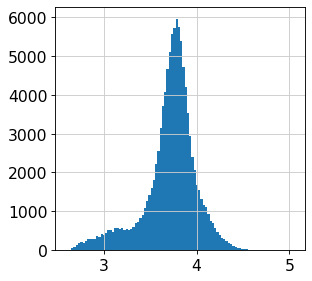

In [7]:
_ = plt.hist(adata.obs['log_counts'], bins=100)

In [8]:
sc.pp.filter_cells(adata, min_genes=300)

filtered out 1983 cells that haveless than 300 genes expressed


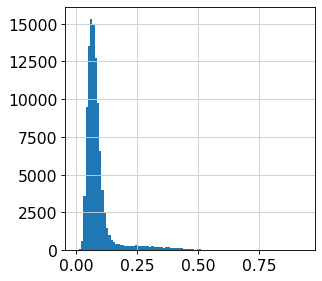

In [9]:
mito_genes = adata.var_names.str.startswith('MT-')
adata.var['Mito_Gene'] = mito_genes
adata.obs['percent_mito'] = np.sum(
    adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
_ = plt.hist(adata.obs['percent_mito'], bins=100)

In [10]:
(adata.obs['percent_mito']>.1).value_counts()

False    85270
True     19792
Name: percent_mito, dtype: int64

In [11]:
adata = adata[adata.obs['percent_mito']<.1, :]

In [12]:
adata

View of AnnData object with n_obs × n_vars = 85257 × 33538 
    obs: 'barcode', 'batch', 'file', 'n_counts', 'log_counts', 'n_genes', 'percent_mito'
    var: 'gene_ids', 'feature_types', 'genome', 'Mito_Gene'

In [13]:
adata.raw = adata.copy()

In [14]:
sc.pp.filter_genes(adata, min_cells=10)

filtered out 11976 genes that are detectedin less than 10 cells


In [15]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=10000)

normalizing by total count per cell
    finished (0:00:02): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [16]:
sc.pp.log1p(adata)

In [17]:
sc.pp.highly_variable_genes(adata, n_top_genes=None)

extracting highly variable genes
    finished (0:00:08)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [18]:
sc.pp.scale(adata, max_value=10)

In [19]:
sc.tl.pca(adata, use_highly_variable=True, random_state=14, svd_solver='arpack')

computing PCA with n_comps = 50
computing PCA on highly variable genes
    finished (0:00:32)


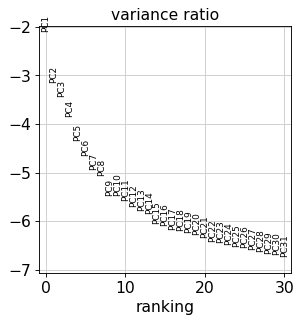

In [20]:
sc.pl.pca_variance_ratio(adata, log=True)

In [21]:
Z = harmonize(adata.obsm['X_pca'], adata.obs, batch_key = 'batch', theta=.5, random_state=14)
adata.obsm['X_harmony'] = Z

	Initialization is completed.
	Completed 1 / 10 iteration(s).
	Completed 2 / 10 iteration(s).
	Completed 3 / 10 iteration(s).
	Completed 4 / 10 iteration(s).
Reach convergence after 4 iteration(s).


In [22]:
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=15, random_state=14, use_rep='X_harmony')
sc.tl.umap(adata, min_dist=.5, spread=1., random_state=14)

computing neighbors


/opt/miniconda3/envs/seqwell/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../../../opt/miniconda3/envs/seqwell/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/opt/miniconda3/envs/seqwell/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../..

    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:01:08)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:02:39)


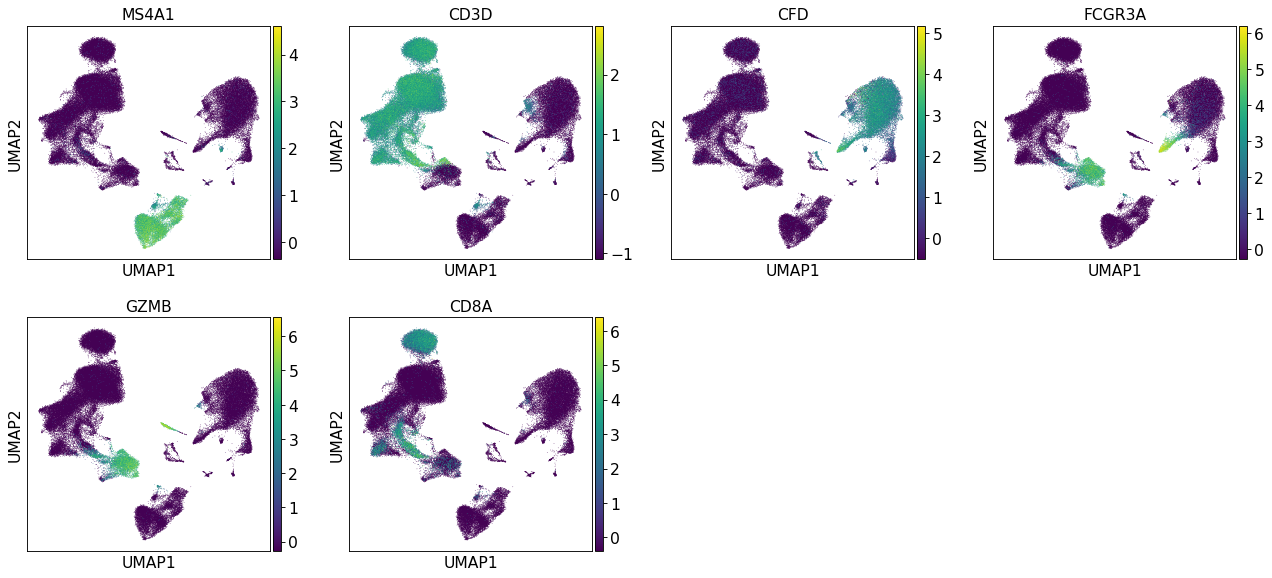

In [23]:
sc.pl.umap(adata, color=['MS4A1', 'CD3D', 'CFD', 'FCGR3A', 'GZMB', 'CD8A'], use_raw=False)

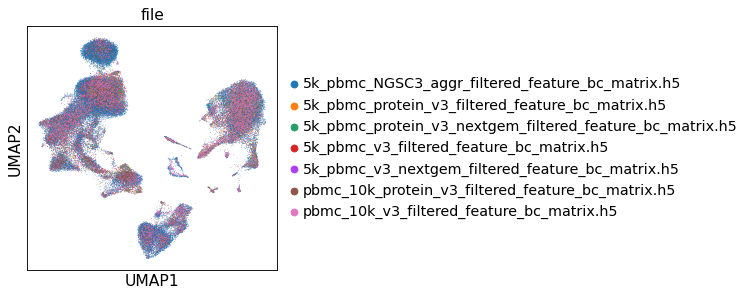

In [24]:
sc.pl.umap(adata, color='file')

In [25]:
sc.tl.leiden(adata, resolution=.7, random_state=14)

running Leiden clustering
    finished: found 19 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:01:16)


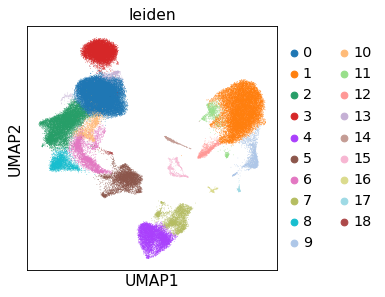

In [26]:
sc.pl.umap(adata, color='leiden')

In [27]:
sc.tl.rank_genes_groups(adata, groupby='leiden')

ranking genes


/opt/miniconda3/envs/seqwell/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:208: RuntimeWarning: overflow encountered in expm1
  foldchanges = (np.expm1(mean_group) + 1e-9) / (np.expm1(mean_rest) + 1e-9)  # add small value to remove 0's
/opt/miniconda3/envs/seqwell/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:223: RuntimeWarning: divide by zero encountered in log2
  rankings_gene_logfoldchanges.append(np.log2(foldchanges[global_indices]))
/opt/miniconda3/envs/seqwell/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:208: RuntimeWarning: overflow encountered in expm1
  foldchanges = (np.expm1(mean_group) + 1e-9) / (np.expm1(mean_rest) + 1e-9)  # add small value to remove 0's
/opt/miniconda3/envs/seqwell/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:208: RuntimeWarning: overflow encountered in expm1
  foldchanges = (np.expm1(mean_group) + 1e-9) / (np.expm1(mean_rest) + 1e-9)  # add small value to remove 0's
/opt/miniconda3/e

    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:01:17)


/opt/miniconda3/envs/seqwell/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:208: RuntimeWarning: overflow encountered in expm1
  foldchanges = (np.expm1(mean_group) + 1e-9) / (np.expm1(mean_rest) + 1e-9)  # add small value to remove 0's


In [28]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,CCR7,CTSS,IL7R,CD8B,CD79A,NKG7,CCL5,BANK1,KLRB1,RPS24,RTKN2,S100A6,LST1,RPL9,PLD4,NRGN,ISG20,RPS24,DCTN3
1,FHIT,MNDA,IL32,CD8A,IGHD,GNLY,CD8A,CD79A,GZMK,TMSB10,FOXP3,MT-ND2,AIF1,RPS16,IRF8,CLU,SPCS2,ZFAS1,TRAPPC1
2,TCF7,S100A6,LTB,RPS12,TCL1A,CST7,CST7,CD37,KLRG1,SAMHD1,IKZF2,S100A4,FCER1G,TRAC,ITM2C,TREML1,CYBA,RPS4X,H2AFV
3,LEF1,TYROBP,TRAC,RPL32,CD79B,KLRD1,IL32,MS4A1,GZMA,CYBA,IL2RA,CTSS,COTL1,NOP53,UGCG,SPARC,SPCS1,BTF3,B2M
4,RPS27,FCN1,AQP3,LINC02446,CD37,GZMA,GZMM,CD79B,LYAR,ARPC3,IL32,FTL,S100A11,TRABD2A,CCDC50,GNG11,SSR4,RACK1,HMGB2
5,PIK3IP1,FTL,CD2,CCR7,LINC00926,KLRF1,LYAR,RALGPS2,NCR3,CTSZ,TIGIT,MT-ND3,TYROBP,RPS20,ALOX5AP,PPBP,PPIB,ATP5MC2,STMN1
6,RPL30,S100A4,ITGB1,NELL2,MS4A1,CTSW,KLRG1,LINC00926,CCL5,COTL1,ARID5B,TYROBP,FTH1,RPL30,SEC61B,NCOA4,RABAC1,RPL5,TMSB4X
7,CD3E,LYZ,GSTK1,RPS28,BANK1,PRF1,GZMK,TNFRSF13C,IL32,HLA-DMA,TRAC,OAZ1,SERPINA1,TCF7,TCF4,PRKAR2B,TMBIM6,EBPL,CALM3
8,TRABD2A,CYBB,LDHB,RPS3A,FCER2,FGFBP2,CTSW,CD74,IL7R,AP2S1,AC133644.2,TSPO,FTL,RPL3,LILRA4,PF4,ITM2C,NPM1,CD99
9,SARAF,TSPO,TRADD,RPS5,HVCN1,CD247,TRGC2,SWAP70,CTSW,HLA-DRA,CTLA4,MT-ND1,FCGR3A,RPS6,PPP1R14B,CTSA,SUB1,EIF3E,PPP1CA


In [47]:
labmap = {'0':'Th 1', '1':'Mono_CD14 1', '2':'Th 2', '3':'Tc 1','4':'B 1', '5':'NK 1', '6':'Tc 2', '7':'B 2',
          '8':'Tc 3', '9':'cDC 1', '10':'Th 3', '11':'Mono_CD14 2', '12':'Mono_CD16 1', '13':'Th 4', '14':'pDC 1', '15':'Platelet 1', '16':'Plasmablast 1',
          '17':'cDC 2', '18':'Th 5'}

In [48]:
adata.obs['leiden_lab'] = adata.obs['leiden'].replace(labmap)
adata.obs['leiden_lab_group'] = adata.obs['leiden_lab'].apply(lambda x: x.split(' ')[0])

... storing 'leiden_lab' as categorical
... storing 'leiden_lab_group' as categorical


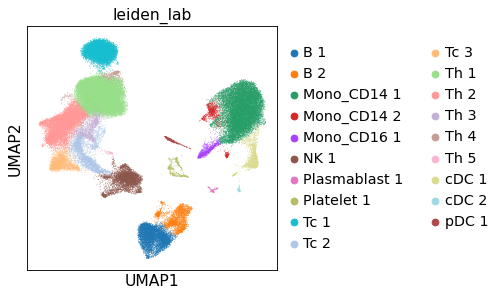

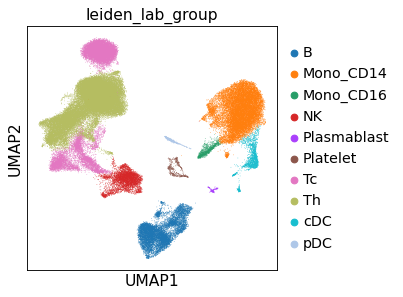

In [49]:
sc.pl.umap(adata, color='leiden_lab')
sc.pl.umap(adata, color='leiden_lab_group')

In [50]:
sorted(adata.obs['leiden_lab'].unique())

['B 1',
 'B 2',
 'Mono_CD14 1',
 'Mono_CD14 2',
 'Mono_CD16 1',
 'NK 1',
 'Plasmablast 1',
 'Platelet 1',
 'Tc 1',
 'Tc 2',
 'Tc 3',
 'Th 1',
 'Th 2',
 'Th 3',
 'Th 4',
 'Th 5',
 'cDC 1',
 'cDC 2',
 'pDC 1']

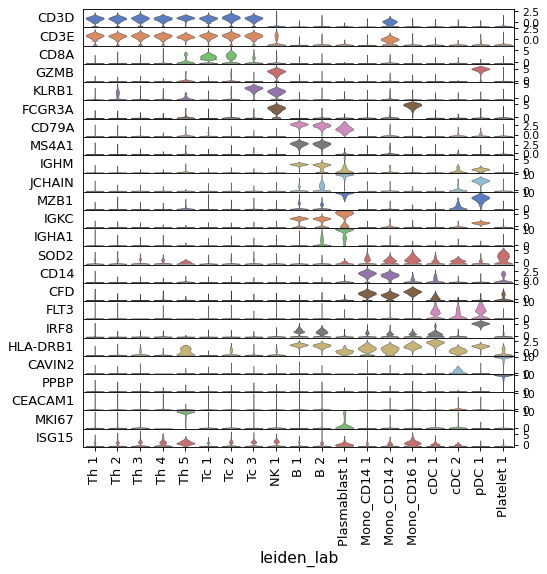

In [52]:
order = ['Th 1', 'Th 2','Th 3', 'Th 4', 'Th 5', 'Tc 1', 'Tc 2', 'Tc 3', 'NK 1', 'B 1', 'B 2', 'Plasmablast 1',
         'Mono_CD14 1','Mono_CD14 2', 'Mono_CD16 1', 'cDC 1', 'cDC 2', 'pDC 1', 'Platelet 1']

_ = sc.pl.stacked_violin(adata, var_names=['CD3D', 'CD3E', 'CD8A', 'GZMB',
                                          'KLRB1', 'FCGR3A',
                                          'CD79A', 'MS4A1', 'IGHM', 'JCHAIN','MZB1', 'IGKC', 'IGHA1',
                                          'SOD2',
                                          'CD14', 'CFD', 'FLT3', 'IRF8', 'HLA-DRB1',
                                          'CAVIN2', 'PPBP', 'CEACAM1',
                                          'MKI67', 'ISG15'], order=order,
                     groupby='leiden_lab', use_raw=False, swap_axes=True)

In [53]:
sc.tl.rank_genes_groups(adata, groupby='leiden_lab')

ranking genes


/opt/miniconda3/envs/seqwell/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:208: RuntimeWarning: overflow encountered in expm1
  foldchanges = (np.expm1(mean_group) + 1e-9) / (np.expm1(mean_rest) + 1e-9)  # add small value to remove 0's
/opt/miniconda3/envs/seqwell/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:208: RuntimeWarning: overflow encountered in expm1
  foldchanges = (np.expm1(mean_group) + 1e-9) / (np.expm1(mean_rest) + 1e-9)  # add small value to remove 0's
/opt/miniconda3/envs/seqwell/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:208: RuntimeWarning: overflow encountered in expm1
  foldchanges = (np.expm1(mean_group) + 1e-9) / (np.expm1(mean_rest) + 1e-9)  # add small value to remove 0's
/opt/miniconda3/envs/seqwell/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:208: RuntimeWarning: overflow encountered in expm1
  foldchanges = (np.expm1(mean_group) + 1e-9) / (np.expm1(mean_rest) + 1e-9)  # add small value to

    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:01:15)


/opt/miniconda3/envs/seqwell/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:208: RuntimeWarning: overflow encountered in expm1
  foldchanges = (np.expm1(mean_group) + 1e-9) / (np.expm1(mean_rest) + 1e-9)  # add small value to remove 0's


In [54]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(20)

,B 1,B 2,Mono_CD14 1,Mono_CD14 2,Mono_CD16 1,NK 1,Plasmablast 1,Platelet 1,Tc 1,Tc 2,Tc 3,Th 1,Th 2,Th 3,Th 4,Th 5,cDC 1,cDC 2,pDC 1
0,CD79A,BANK1,CTSS,S100A6,LST1,NKG7,ISG20,NRGN,CD8B,CCL5,KLRB1,CCR7,IL7R,RTKN2,RPL9,DCTN3,RPS24,RPS24,PLD4
1,IGHD,CD79A,MNDA,MT-ND2,AIF1,GNLY,SPCS2,CLU,CD8A,CD8A,GZMK,FHIT,IL32,FOXP3,RPS16,TRAPPC1,TMSB10,ZFAS1,IRF8
2,TCL1A,CD37,S100A6,S100A4,FCER1G,CST7,CYBA,TREML1,RPS12,CST7,KLRG1,TCF7,LTB,IKZF2,TRAC,H2AFV,SAMHD1,RPS4X,ITM2C
3,CD79B,MS4A1,TYROBP,CTSS,COTL1,KLRD1,SPCS1,SPARC,RPL32,IL32,GZMA,LEF1,TRAC,IL2RA,NOP53,B2M,CYBA,BTF3,UGCG
4,CD37,CD79B,FCN1,FTL,S100A11,GZMA,SSR4,GNG11,LINC02446,GZMM,LYAR,RPS27,AQP3,IL32,TRABD2A,HMGB2,ARPC3,RACK1,CCDC50
5,LINC00926,RALGPS2,FTL,MT-ND3,TYROBP,KLRF1,PPIB,PPBP,CCR7,LYAR,NCR3,PIK3IP1,CD2,TIGIT,RPS20,STMN1,CTSZ,ATP5MC2,ALOX5AP
6,MS4A1,LINC00926,S100A4,TYROBP,FTH1,CTSW,RABAC1,NCOA4,NELL2,KLRG1,CCL5,RPL30,ITGB1,ARID5B,RPL30,TMSB4X,COTL1,RPL5,SEC61B
7,BANK1,TNFRSF13C,LYZ,OAZ1,SERPINA1,PRF1,TMBIM6,PRKAR2B,RPS28,GZMK,IL32,CD3E,GSTK1,TRAC,TCF7,CALM3,HLA-DMA,EBPL,TCF4
8,FCER2,CD74,CYBB,TSPO,FTL,FGFBP2,ITM2C,PF4,RPS3A,CTSW,IL7R,TRABD2A,LDHB,AC133644.2,RPL3,CD99,AP2S1,NPM1,LILRA4
9,HVCN1,SWAP70,TSPO,MT-ND1,FCGR3A,CD247,SUB1,CTSA,RPS5,TRGC2,CTSW,SARAF,TRADD,CTLA4,RPS6,PPP1CA,HLA-DRA,EIF3E,PPP1R14B


In [55]:
umapdata = adata.obs.copy()
umapdata['UMAP_1'] = adata.obsm['X_umap'][:,0]
umapdata['UMAP_2'] = adata.obsm['X_umap'][:,1]

In [56]:
umapdata['leiden_lab_group_clean'] = umapdata['leiden_lab_group'].replace({'Tc':'T CD8+', 'Th':'T CD4+', 'Mono_CD14':'Mono CD14+', 'Mono_CD16':'Mono CD16+', 'Plasmablast':'Plasma.'})
umapdata['leiden_lab_group_clean'].unique()

array(['Mono CD14+', 'T CD4+', 'T CD8+', 'B', 'NK', 'cDC', 'pDC',
       'Mono CD16+', 'Platelet', 'Plasma.'], dtype=object)

array(['B', 'Mono CD14+', 'Mono CD16+', 'NK', 'Plasma.', 'Platelet',
       'T CD4+', 'T CD8+', 'cDC', 'pDC'], dtype=object)

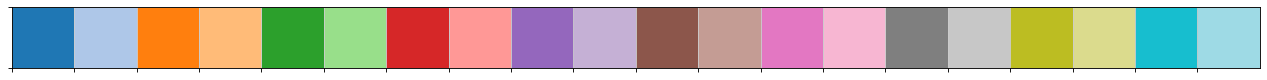

In [63]:
clustering = np.unique(umapdata['leiden_lab_group_clean'])
c = palettable.tableau.Tableau_20.hex_colors
sns.palplot(c)
celltype_colors = {'B':c[0], 'Plasma.':c[19], 'T CD8+':c[3], 'T CD4+':c[2], 'NK':c[6], 'ISG-hi':c[7], 'Mono CD14+':c[4],
                   'Mono CD16+':c[5], 'cDC':c[10], 'pDC':c[11],'Replicating':c[12], 'Platelet':c[9]}
umapdata['cluster_color'] = umapdata['leiden_lab_group_clean'].apply(lambda x: celltype_colors[x])
clustering

In [64]:
from matplotlib import rcParams

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Myriad Pro']

rcParams['axes.titlesize'] = 9
rcParams['axes.labelsize'] = 9
rcParams['xtick.labelsize'] = 7
rcParams['ytick.labelsize'] = 7

rcParams['xtick.major.pad']='1'
rcParams['ytick.major.pad']='1'

rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

In [71]:
box_height=1.3
box_width=1.3
title_height=.33
left_space = .02
right_space = .98
bottom_space = .02
top_space = .98

dotsize=.2
valdpi = 200

In [72]:
celltype_order_clean = ['T CD4+', 'T CD8+', 'NK', 'B', 'Plasma.',
                        'Mono CD14+', 'Mono CD16+', 'pDC', 'cDC', 'Platelet']

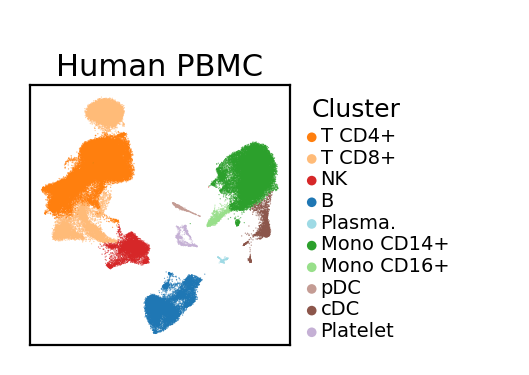

In [73]:
leg_width=1.1
ax_width = leg_width+box_width
fig_width = ax_width/(right_space-left_space)
ax_height = title_height+box_height
fig_height = ax_height/(top_space-bottom_space)
fig_width, fig_height

fig = plt.figure(figsize=(fig_width, fig_height), dpi=valdpi)
gs = gridspec.GridSpec(2, 2, fig,
                       left_space, bottom_space, right_space,top_space,
                       hspace=0.0, wspace=0.0,
                       width_ratios=(box_width, leg_width),
                       height_ratios=(title_height, box_height))

ax = fig.add_subplot(gs[1, 0],
          xscale='linear', yscale='linear',
          frameon=True, ylabel='', xlabel='',
          title='',
          xticks=[], yticks=[])


ax.scatter(umapdata['UMAP_1'], umapdata['UMAP_2'], c=umapdata['cluster_color'],
           s=dotsize, alpha=.7, edgecolor='None', rasterized=True)

legend_ax = fig.add_subplot(gs[1, 1],
          xscale='linear', yscale='linear',
          frameon=False, ylabel='', xlabel='',
          title='',
          xticks=[], yticks=[])

legend_ax.set_ylim([0, 1])
legend_ax.set_xlim([0, 1])
marker_x=.1
N = len(celltype_order_clean)
for (i,y) in enumerate(np.linspace(.8, .05, num=N)):
    ct = celltype_order_clean[i]
    legend_ax.scatter(marker_x, y, color=celltype_colors[ct], s=12, edgecolor='None')
    legend_ax.text(marker_x+.04, y-.015, ct, fontsize=7)
legend_ax.text(.1, .88, 'Cluster', fontsize=9)

title_ax = fig.add_subplot(gs[0, 0],
          xscale='linear', yscale='linear',
          frameon=False, ylabel='', xlabel='',
          title='', xlim=[0,1], ylim=[0,1],
          xticks=[], yticks=[])

title_ax.text(0.50, 0.5, 'Human PBMC', va='top', ha='center',
              fontsize=11, fontdict=dict(weight='normal'),
              clip_on=False)

figure_file = os.path.join(results_dir, "Human.PBMC.scRNAseq.UMAP.pdf")
fig.savefig(figure_file, dpi=300)

In [68]:
save_adata(adata, '../../../data/HCA_BoneMarrow/PBMC/Merge/Merged.10X.V3.PBMC.processed.h5ad')


Only considering the two last: ['.processed', '.h5ad'].
Only considering the two last: ['.processed', '.h5ad'].


In [69]:
adata.obs['leiden_lab_group'].value_counts()

Th             34701
Mono_CD14      17216
Tc             15267
B               9432
NK              4634
cDC             1850
Mono_CD16        982
pDC              519
Platelet         496
Plasmablast      160
Name: leiden_lab_group, dtype: int64

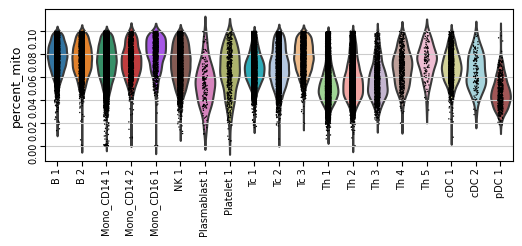

In [70]:
(fig,ax) = plt.subplots(1,1, figsize=(6,2), dpi=100)
sc.pl.violin(adata, 'percent_mito', groupby='leiden_lab', ax=ax, rotation=90)